# The normal distribution

In this lab we'll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we'll use the graphical tools of Python to assess the normality of our data and also learn how to generate random numbers from a normal distribution.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

## The data

This week we'll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [1]:
import pandas as pd

bdims = pd.read_csv('https://www.openintro.org/stat/data/bdims.csv')

Let's take a quick peek at the first few rows of the data.

In [2]:
bdims.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


You'll see that for every observation we have 25 measurements, many of which are either diameters or girths. A key to the variable names can be found at http://www.openintro.org/stat/data/bdims.php, but we'll be focusing on just three columns to get started: weight in kg (wgt), height in cm (hgt), and sex (1 indicates male, 0 indicates female).

Since males and females tend to have different body dimensions, it will be useful to create two additional data sets: one with only men and another with only women.

In [3]:
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

<div class = 'exercise'>
<h4>Exercise 1</h4>
Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?
</div>

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

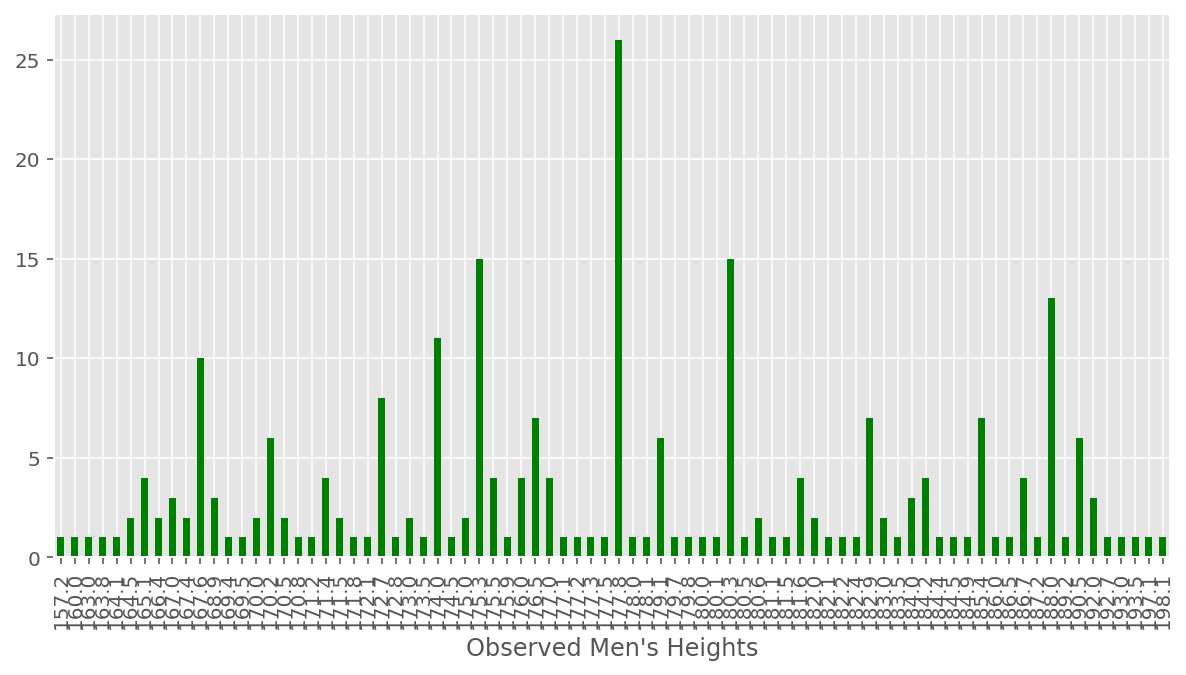

In [7]:
# count observations per observed height, in 'mdims'
m_hgt_counts = mdims['hgt'].value_counts().sort_index()

# for initial data exploration, we may utilize a bar chart
m_hgt_counts.plot(kind='bar', color = 'green')
plt.xlabel('Observed Men\'s Heights')
plt.show();

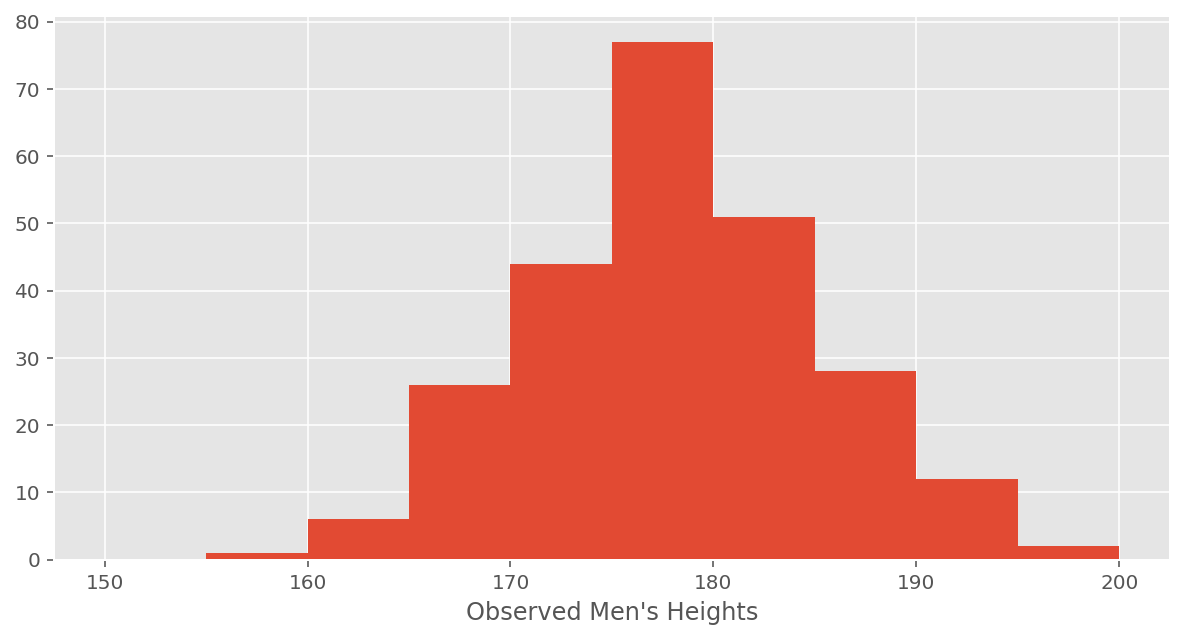

In [20]:
# now that we know how the data appears, the min / max observed, etc.,
# make histogram of men's heights - requires 'plt.hist(data, bins=bins_list)'
# where data: the data to be plotted,
#       bins: optional argument taking a list (iterable?) of bin boundaries
import numpy as np
bins_list = np.arange(150.0,205.0,5.0)
plt.hist(mdims['hgt'], bins=bins_list)
plt.xlabel('Observed Men\'s Heights')
plt.show();

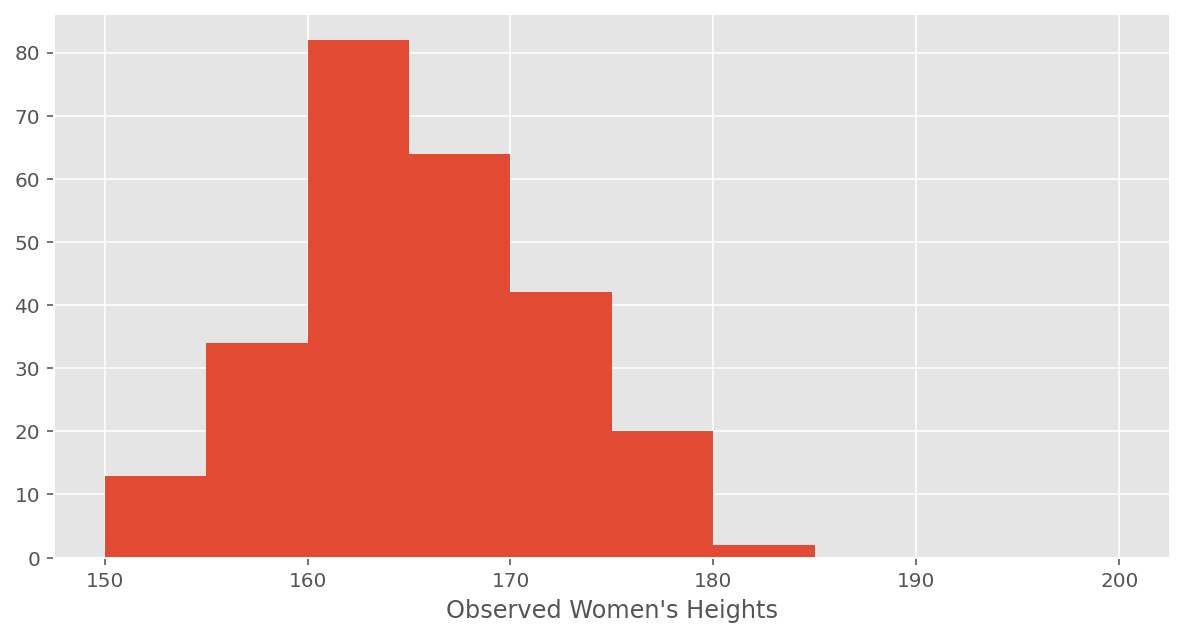

In [22]:
# make histogram of women's heights, using same bin locations & bin size
plt.hist(fdims['hgt'], bins=bins_list)
plt.xlabel('Observed Women\'s Heights')
plt.show();

From visually inspecting both histograms, the mean height observed for the women in this sample is around 165", less than the mean height observed for the men (around 177".) Also, the variability (standard deviation) for the women's heights distribution appear slightly less than for the men's height distribution (i.e. closer "clustering" around the mean.) 

Both are unimodal, approximately symmetric "bell curve" shapes.

## The normal distribution

In your description of the distributions, did you use words like *bell-shaped or normal*? It's tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We'll be working with women's heights, so let’s store them as a separate object and then calculate some statistics that will be referenced later.

In [24]:
fhgtmean = fdims['hgt'].mean()
fhgtsd =  fdims['hgt'].std()

Next we make a density histogram to use as the backdrop and use the `distplot()` function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram and the density histogram created by the commands below.

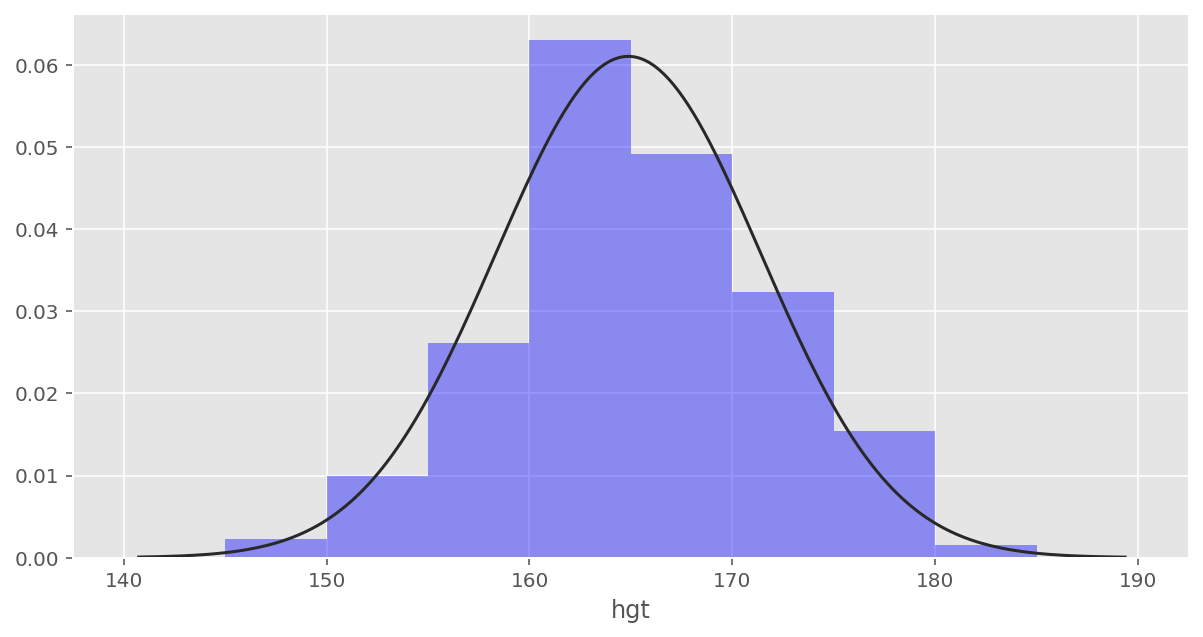

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.distplot(fdims['hgt'], fit = norm, kde = False, bins = 10, hist_kws={'range': [140,190]}, color = 'blue')
plt.show();

<div class = 'exercise'>
<h4>Exercise 2</h4>
Based on the this plot, does it appear that the data follow a nearly normal distribution?
</div>

Yes: for each bar on the density histogram, its ordinate (i.e. that bar's _normalized_ relative frequency, for an observation from the dataset to get included within that bar) is roughly equal to the normal distribution curve's value at the abscissa midway along the bar width.

## Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".

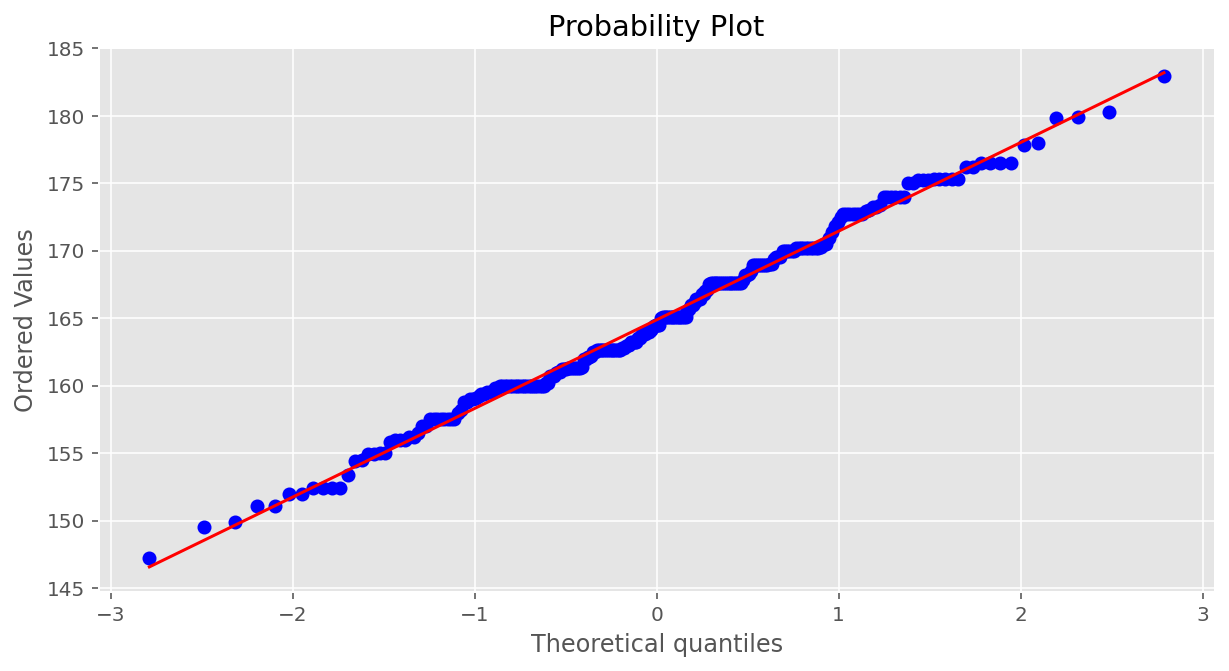

In [26]:
from scipy.stats import probplot
probplot(fdims['hgt'], plot = plt)
plt.show();

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using `numpy.random.normal()`.

In [27]:
import numpy as np

sim_norm = np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd)

The first argument indicates how many numbers you’d like to generate, which we specify to be the same number of heights in the  `fdims` data set using the `len()` function. The last two arguments (`loc` and `scale`) determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set,  `sim_norm`, as well as its normal probability plot.

<div class = 'exercise'>
<h4>Exercise 3</h4>
Make a normal probability plot of <code>sim_norm</code>. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
</div>

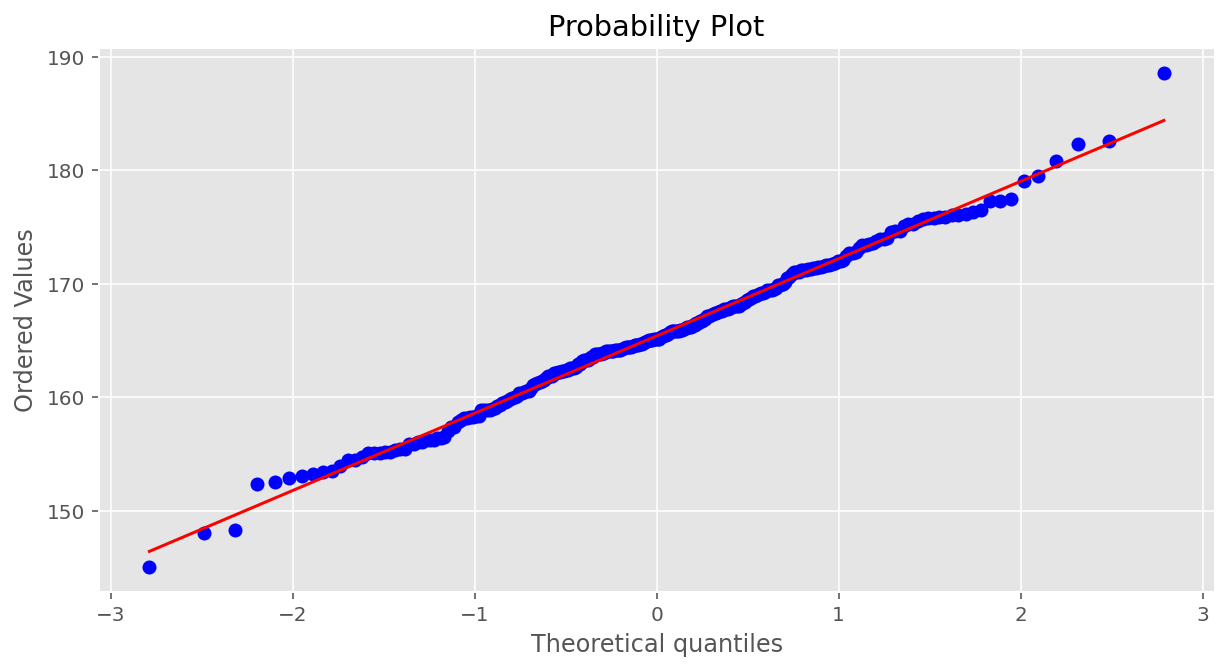

In [28]:
from scipy.stats import probplot
probplot(sim_norm, plot=plt)
plt.show();

Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots using the following function:

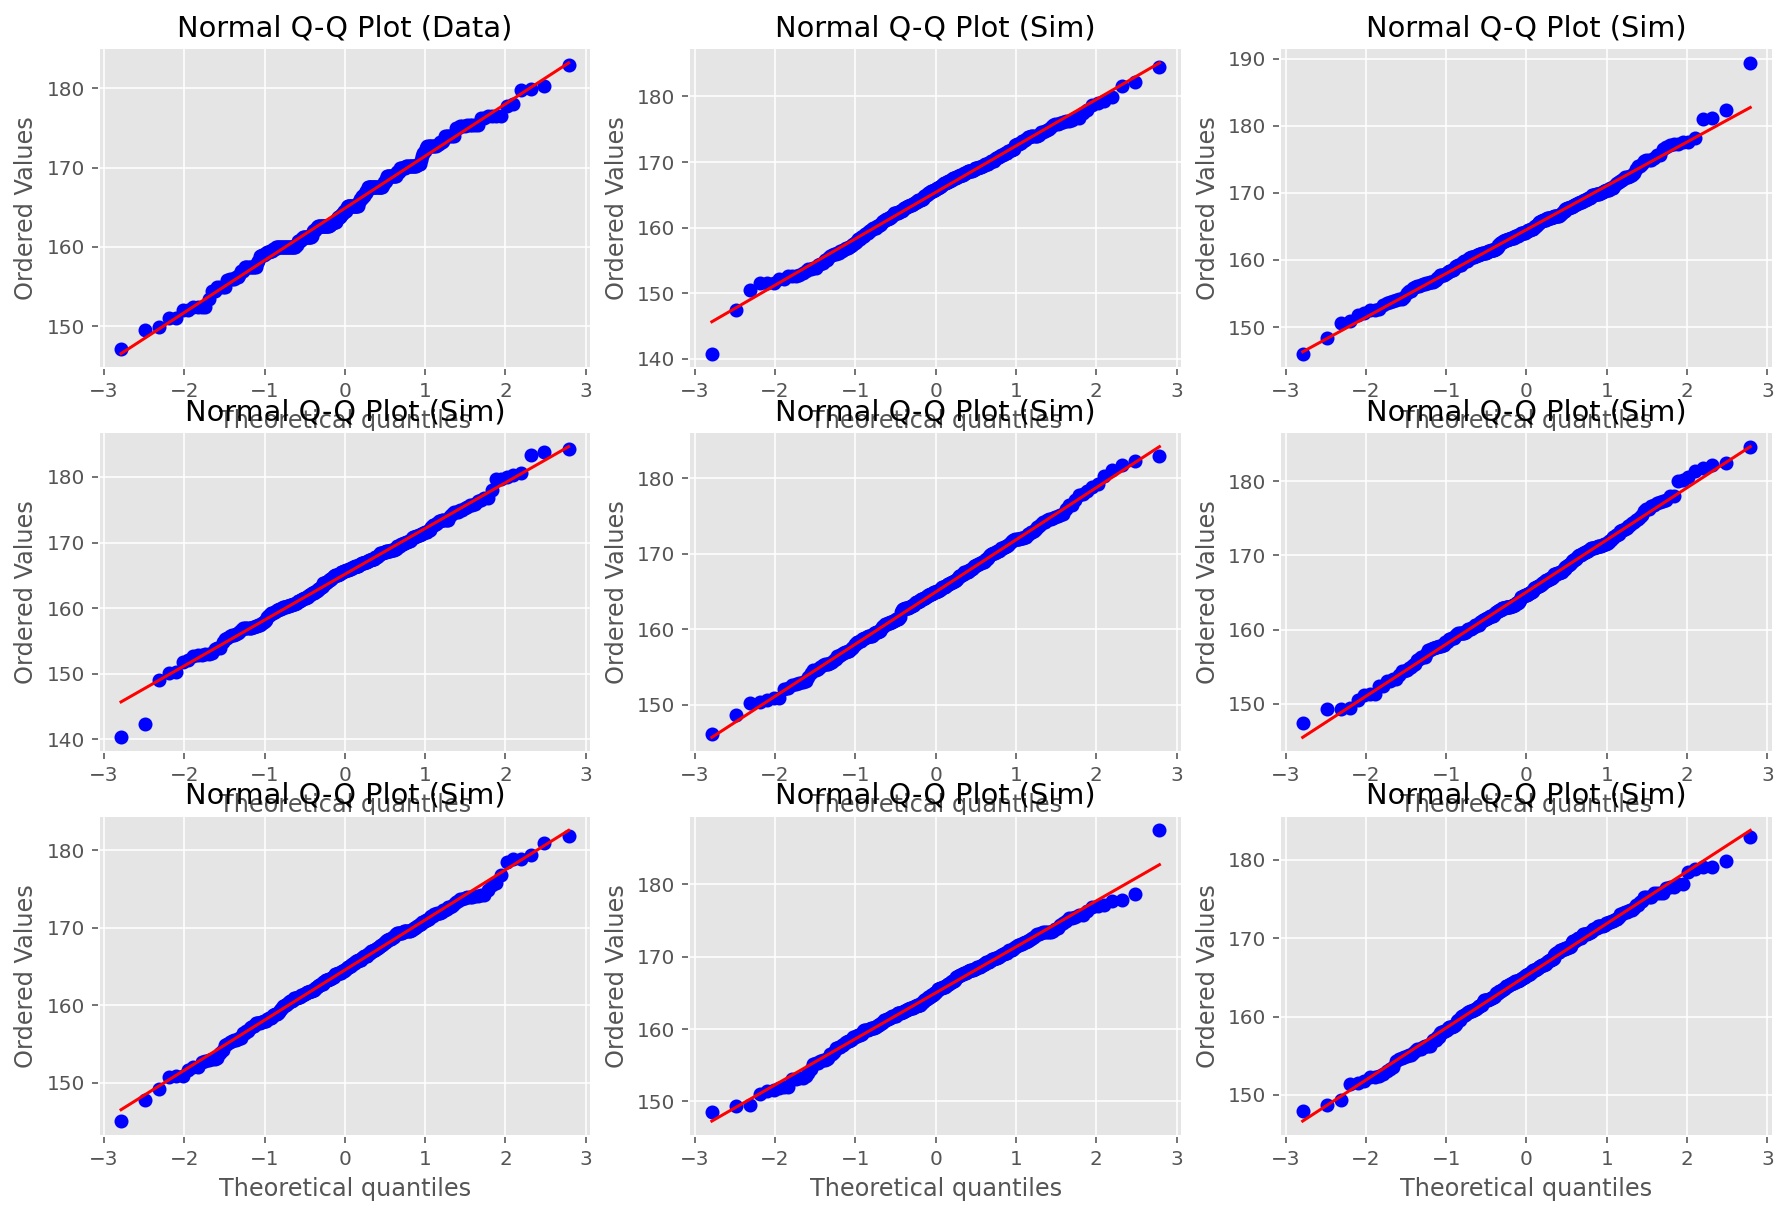

In [29]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15,10)
plt.tight_layout() # adjust the subplots to fit in to the figure area.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim)')

plt.show();

<div class = 'exercise'>
<h4>Exercise 4</h4>
Does the normal probability plot for <code>fdims['hgt']</code> look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?
</div>

Yes, the normal probability plot for the observed women's-heights distribution is similarly shaped, with respect to the observed vs. theoretical sorting of individual cases into quantiles, to the simulated-data quantile-quantile plots with respect to the same sorting. (The actual dataset shows some scatter outliers at the remote ends of the Q-Q plot, but this also occurs in the simulated data Q-Q plots for which the simulated data follows a normal distribution by construction: so we know that the actual dataset's behavior in this respect is not particularly anomalous.) So, the plots provide evidence that the female heights are nearly normal.

<div class = 'exercise'>
<h4>Exercise 5</h4>
Using the same technique, determine whether or not female weights appear to come from a normal distribution.
</div>

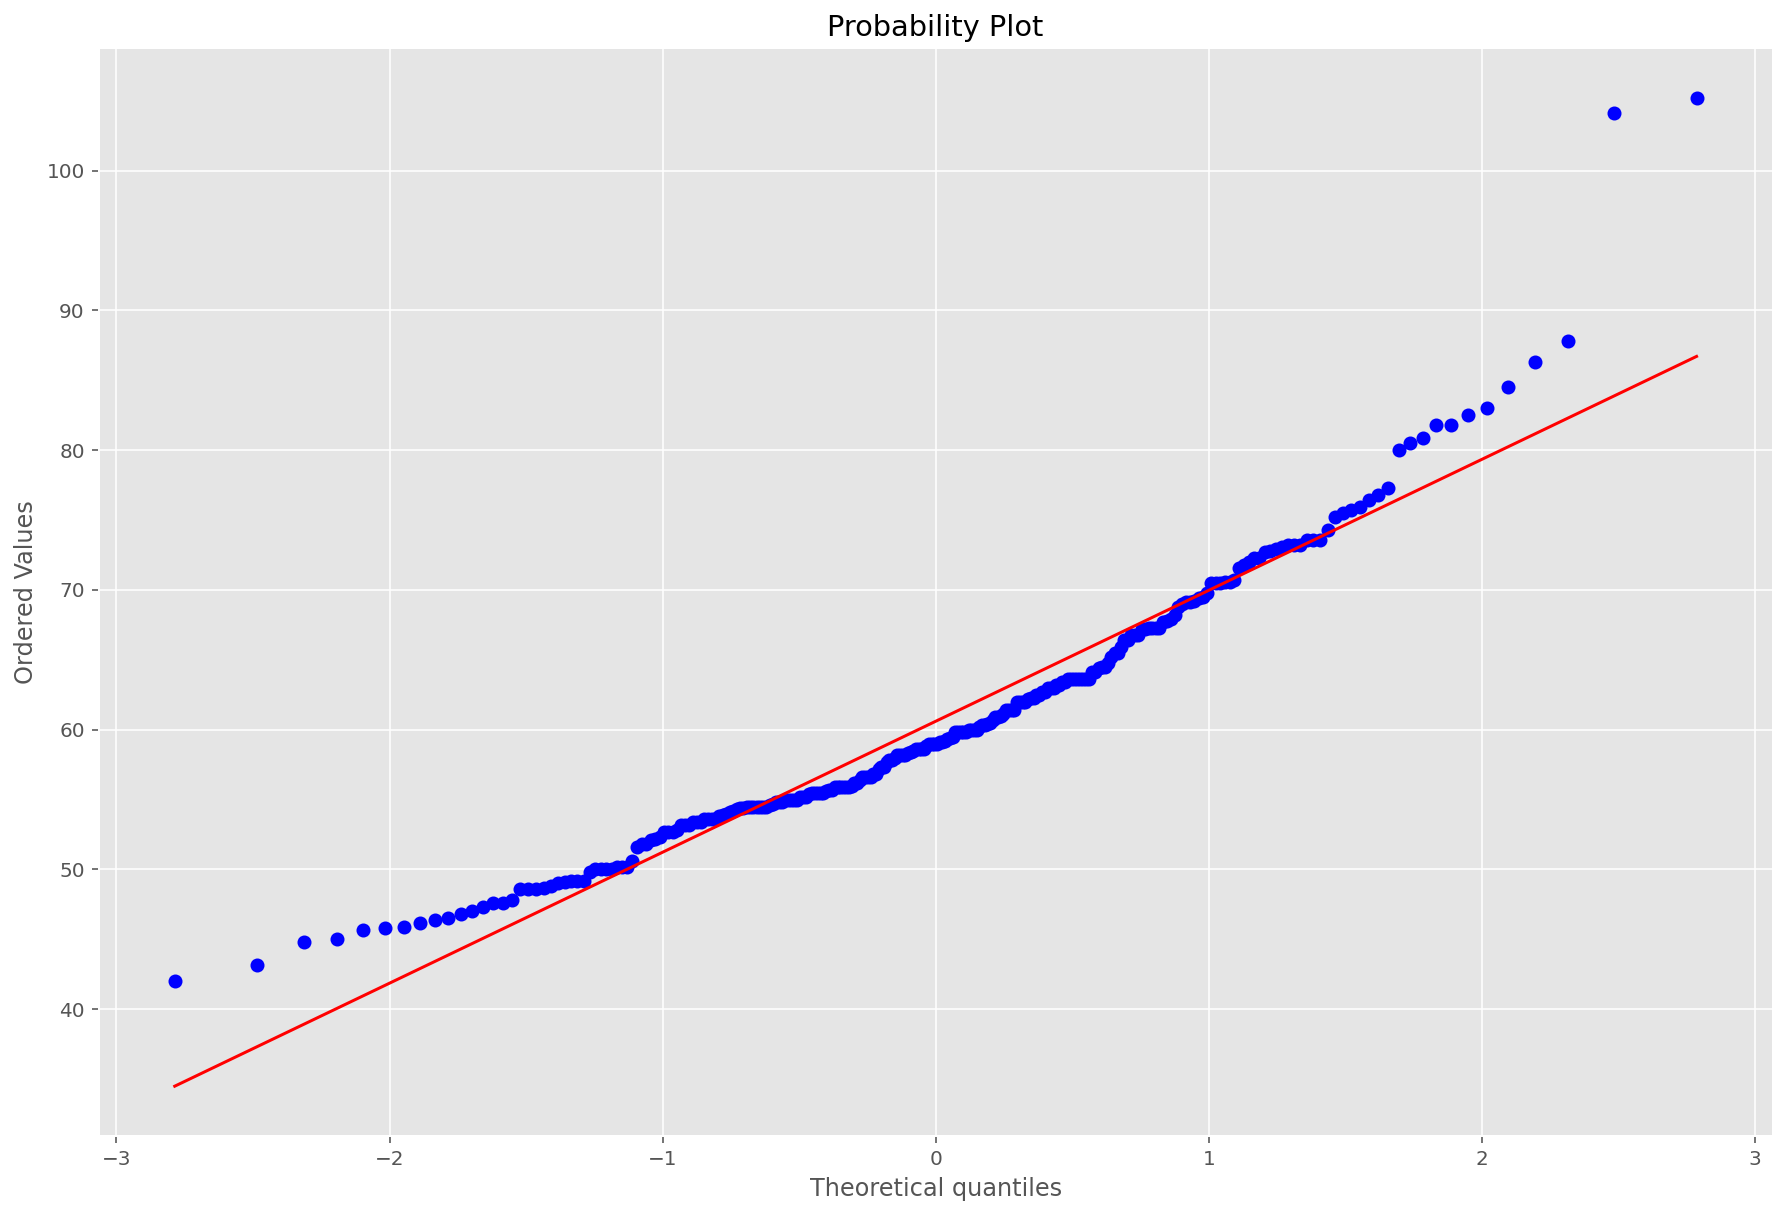

In [31]:
# normal probability plot for the 'fdims['wgt']'
probplot(fdims['wgt'], plot=plt)
plt.show();
# At first glance, the distribution for observed women's weights 
# immediately appears less consistent with a normal distribution.

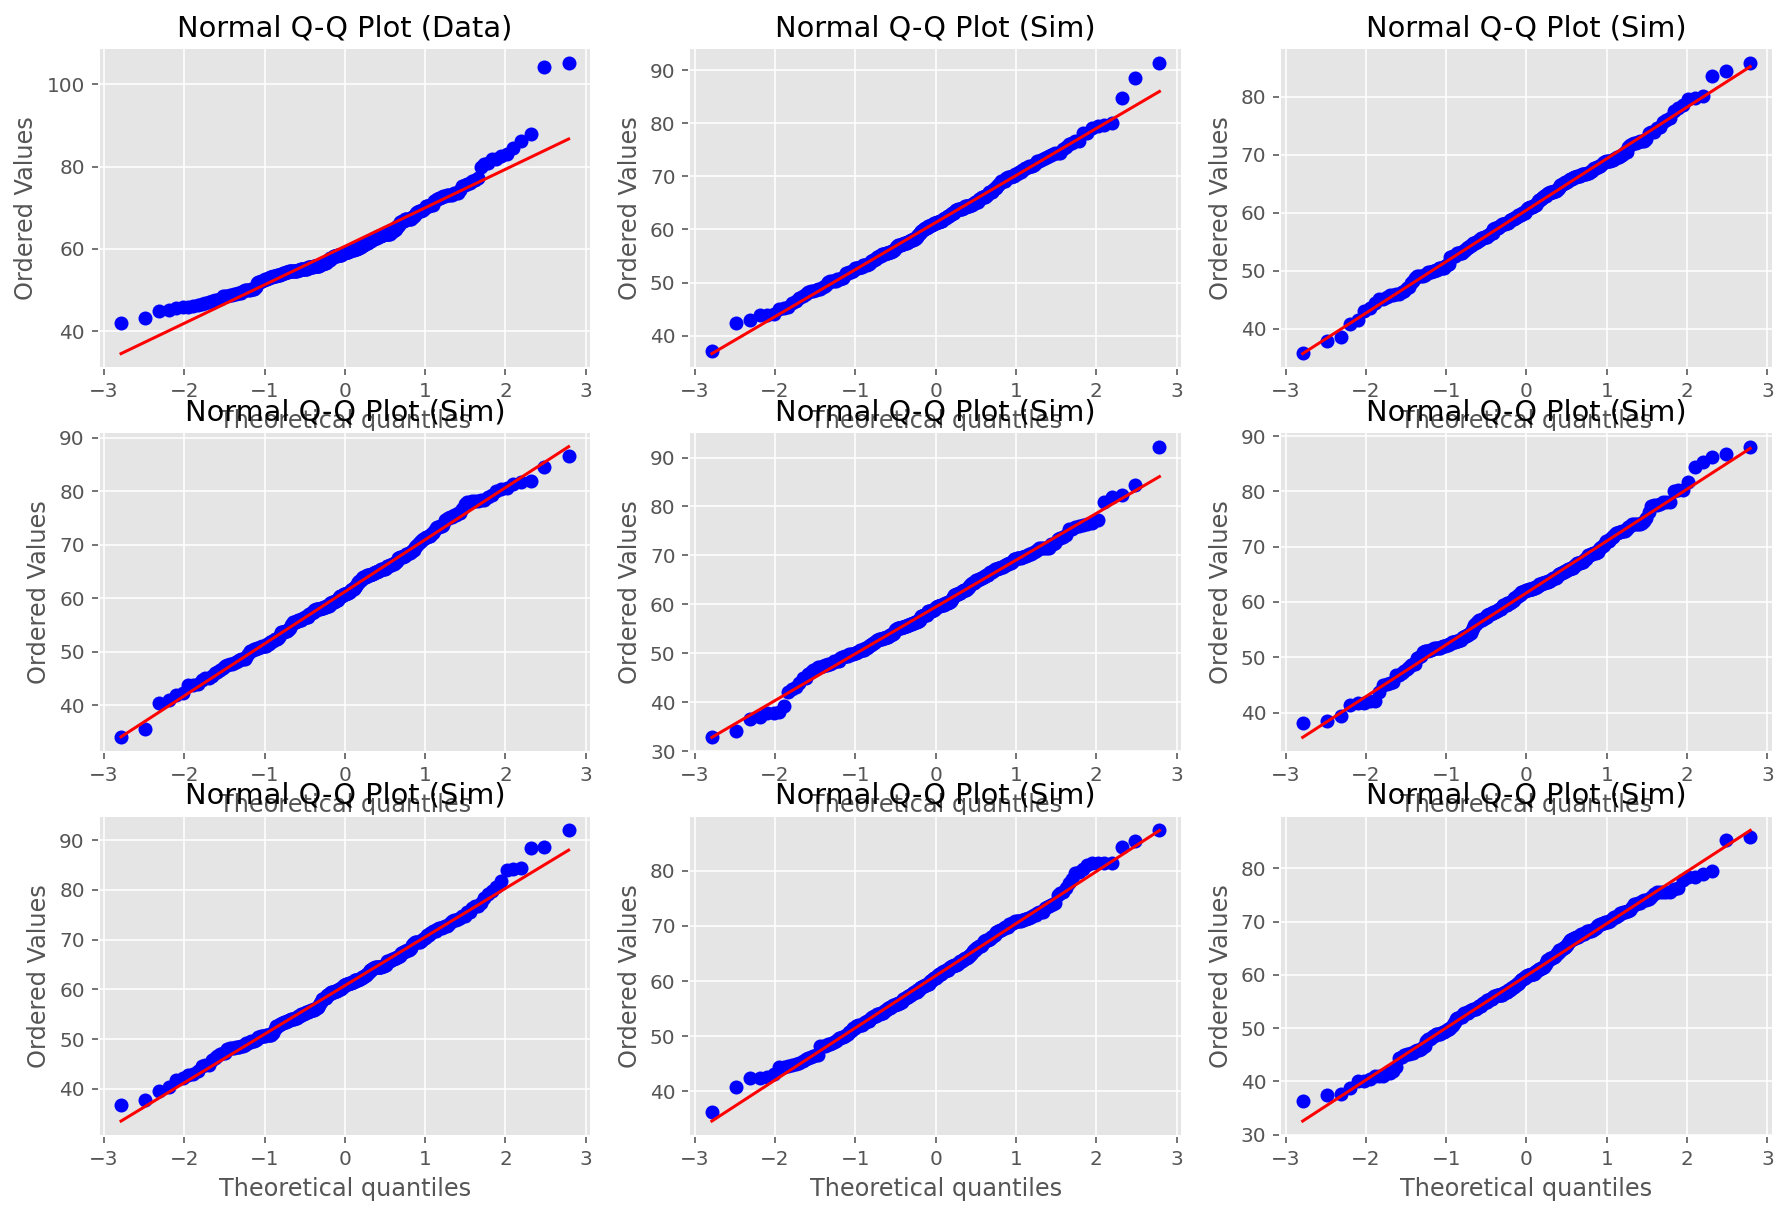

In [41]:
# get mean and std. dev.
fwgtmean = fdims['wgt'].mean()
fwgtsd = fdims['wgt'].std()

# now, draw random samples from a normal distribution which has been given
# these parameters, eight times to get a series of plots for visual comparison
sim_wgt_norm_8 = []
for j in range(8):
    sim_wgt_norm_8.append(np.random.normal(size=len(fdims['wgt']), loc=fwgtmean, scale=fwgtsd))
    
# compare the normal probability plot (Q-Q plot) from the original data with
# those for the 8 simulated datasets.
plt.rcParams['figure.figsize'] = (15,10)
plt.tight_layout() # adjust the plots to fit within the figure size

# Q-Q plot for real data, followed by Q-Q plot for each of the simulations 
plt.subplot(3, 3, 1)
probplot(fdims['wgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

for j in range(8): # 0 through 7
    plt.subplot(3, 3, j+2)
    probplot(sim_wgt_norm_8[j], plot = plt)
    plt.title('Normal Q-Q Plot (Sim)')

plt.show();

The Q-Q plot for the observed women's-weights distribution aligns poorly with the theoretical quantiles (it appears to actual curve off of the theoretical line that otherwise would be expected, in the case of an approximate normal distribution: this is especially pronounced for the extreme observations, at either "tail" of the observed distribution.) This is clear when comparing with the Q-Q plots for the simulated datasets, selected using a normal distribution whose parameters are taken from the original data. So, the female weights do not appear to come from a normal distribution.

## Normal probabilities

Okay, so now you have a slew of tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, "What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?" (The study that published this data set is clear to point out that the sample was not random and therefore inference to a general population is not suggested. We do so here only as an exercise.)

If we assume that female heights are normally distributed (a very close approximation is also okay), we can find this probability by calculating a Z score and consulting a Z table (also called a normal probability table). In Python, this is done in one step with the function `stats.norm.cdf()`.

In [42]:
import scipy.stats as stats

1 - stats.norm.cdf(182, loc = fhgtmean, scale = fhgtsd)

0.004434386918686806

Note that the function `stats.norm.cdf()` gives the area under the normal curve below a given value, with a given mean and standard deviation. Since we're interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

Assuming a normal distribution has allowed us to calculate a theoretical probability. If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [44]:
(sum(fdims['hgt']) > 182) / len(fdims['hgt'])

0.0038461538461538464

In [47]:
# alternatively:
len(fdims[fdims['hgt'] > 182]) / len(fdims['hgt'])

0.0038461538461538464

In [48]:
# or (since 'sum' on an array of booleans will count up all True's):
sum(fdims['hgt'] > 182) / len(fdims['hgt'])

0.0038461538461538464

Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

<div class = 'exercise'>
<h4>Exercise 6</h4>
Write out two probability questions that you would like to answer; one regarding female heights and one regarding female weights. Calculate the those probabilities using both the theoretical normal distribution as well as the empirical distribution (four probabilities in all). Which variable, height or weight, had a closer agreement between the two methods?
</div>

_If you select a woman at random, what is the probability that her height is between 170" and 175"?_

In [51]:
# Assume that the distribution of women's heights _in general_ is modeled
# suitably by using a normal distribution with parameters based on the 
# observations in this sample:
import scipy.stats as stats
prob_below_175 = stats.norm.cdf(175, loc=fhgtmean, scale=fhgtsd)
prob_below_170 = stats.norm.cdf(170, loc=fhgtmean, scale=fhgtsd)
prob_170_to_175 = prob_below_175 - prob_below_170
prob_170_to_175 # Theoretical: about 15.6%

0.15579410657625226

In [66]:
# Now, calculate this empirically
sum((fdims['hgt'] >= 170) & (fdims['hgt'] <= 175)) / len(fdims['hgt'])
# Empirical: about 16.9%

0.16923076923076924

Theoretical probability of ~ 15.6% is not far from the empirical probability for this particular sample, ~ 16.9%, so our use of the normal-distribution assumption performed decently well.

What about for a dataset (the observed women's weights) where agreement of the empirical data with a normal distribution is _not_ close? e.g.:
_If you a select a woman at random, what is the probability that her weight is between 65 kg. and 70 kg.?_

In [68]:
# Assume that the distribution of women's weights _in general_ is modeled
# suitably by using a normal distribution with parameters based on the 
# observations in this sample:
import scipy.stats as stats
prob_below_70 = stats.norm.cdf(70, loc=fwgtmean, scale=fwgtsd)
prob_below_65 = stats.norm.cdf(65, loc=fwgtmean, scale=fwgtsd)
prob_65_to_70 = prob_below_70 - prob_below_65
prob_65_to_70 # Theoretical: about 16.0 %

0.15948576951538784

In [70]:
# Now, calculate this empirically
sum((fdims['wgt'] >= 65) & (fdims['wgt'] <= 70)) / len(fdims['wgt'])
# Empirical: about 10.4%

0.10384615384615385

This time, the theoretical predicted probability (based upon our normal-distribution assumption) was off by _about half of the empirically based probability!_ This is consistent with our prior conclusion, above, that the distribution of women's weights in this sample is _not_ suitably modeled by a normal distribution.

---
## On Your Own

<ol>
    <li>Now let’s consider some of the other variables in the body dimensions data set. Using the figures at the end of the exercises, match the histogram to its normal probability plot. All of the variables have been standardized (first subtract the mean, then divide by the standard deviation), so the units won’t be of any help. If you are uncertain based on these figures, generate the plots with Python to check.</li><br>
    <ul>
        <li>The histogram for female biiliac (pelvic) diameter (<code>bii.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female elbow diameter (<code>elb.di</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for general age (<code>age</code>) belongs to normal probability plot letter ____.</li>
        <li>The histogram for female chest depth (<code>che.de</code>) belongs to normal probability plot letter ____.</li>
    </ul><br>
    <li>Note that normal probability plots C and D have a slight stepwise pattern. Why do you think this is the case?</li><br>
    <li>As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (<code>kne.di</code>). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.</li><br>
</ol>
<img src='https://github.com/imranture/OpenIntro/blob/master/histQQmatch.png?raw=true'>


_1. The image providing the histograms / normal probability plots (Q-Q plots) for this exercise won't render: I'll make them myself instead!_

In [75]:
# female biiliac (pelvic) diameter (bii.di) 
fbii_dis = fdims['bii.di']
fbii_dis_min, fbii_dis_max = fbii_dis.min(), fbii_dis.max() # 18.7, 33.3

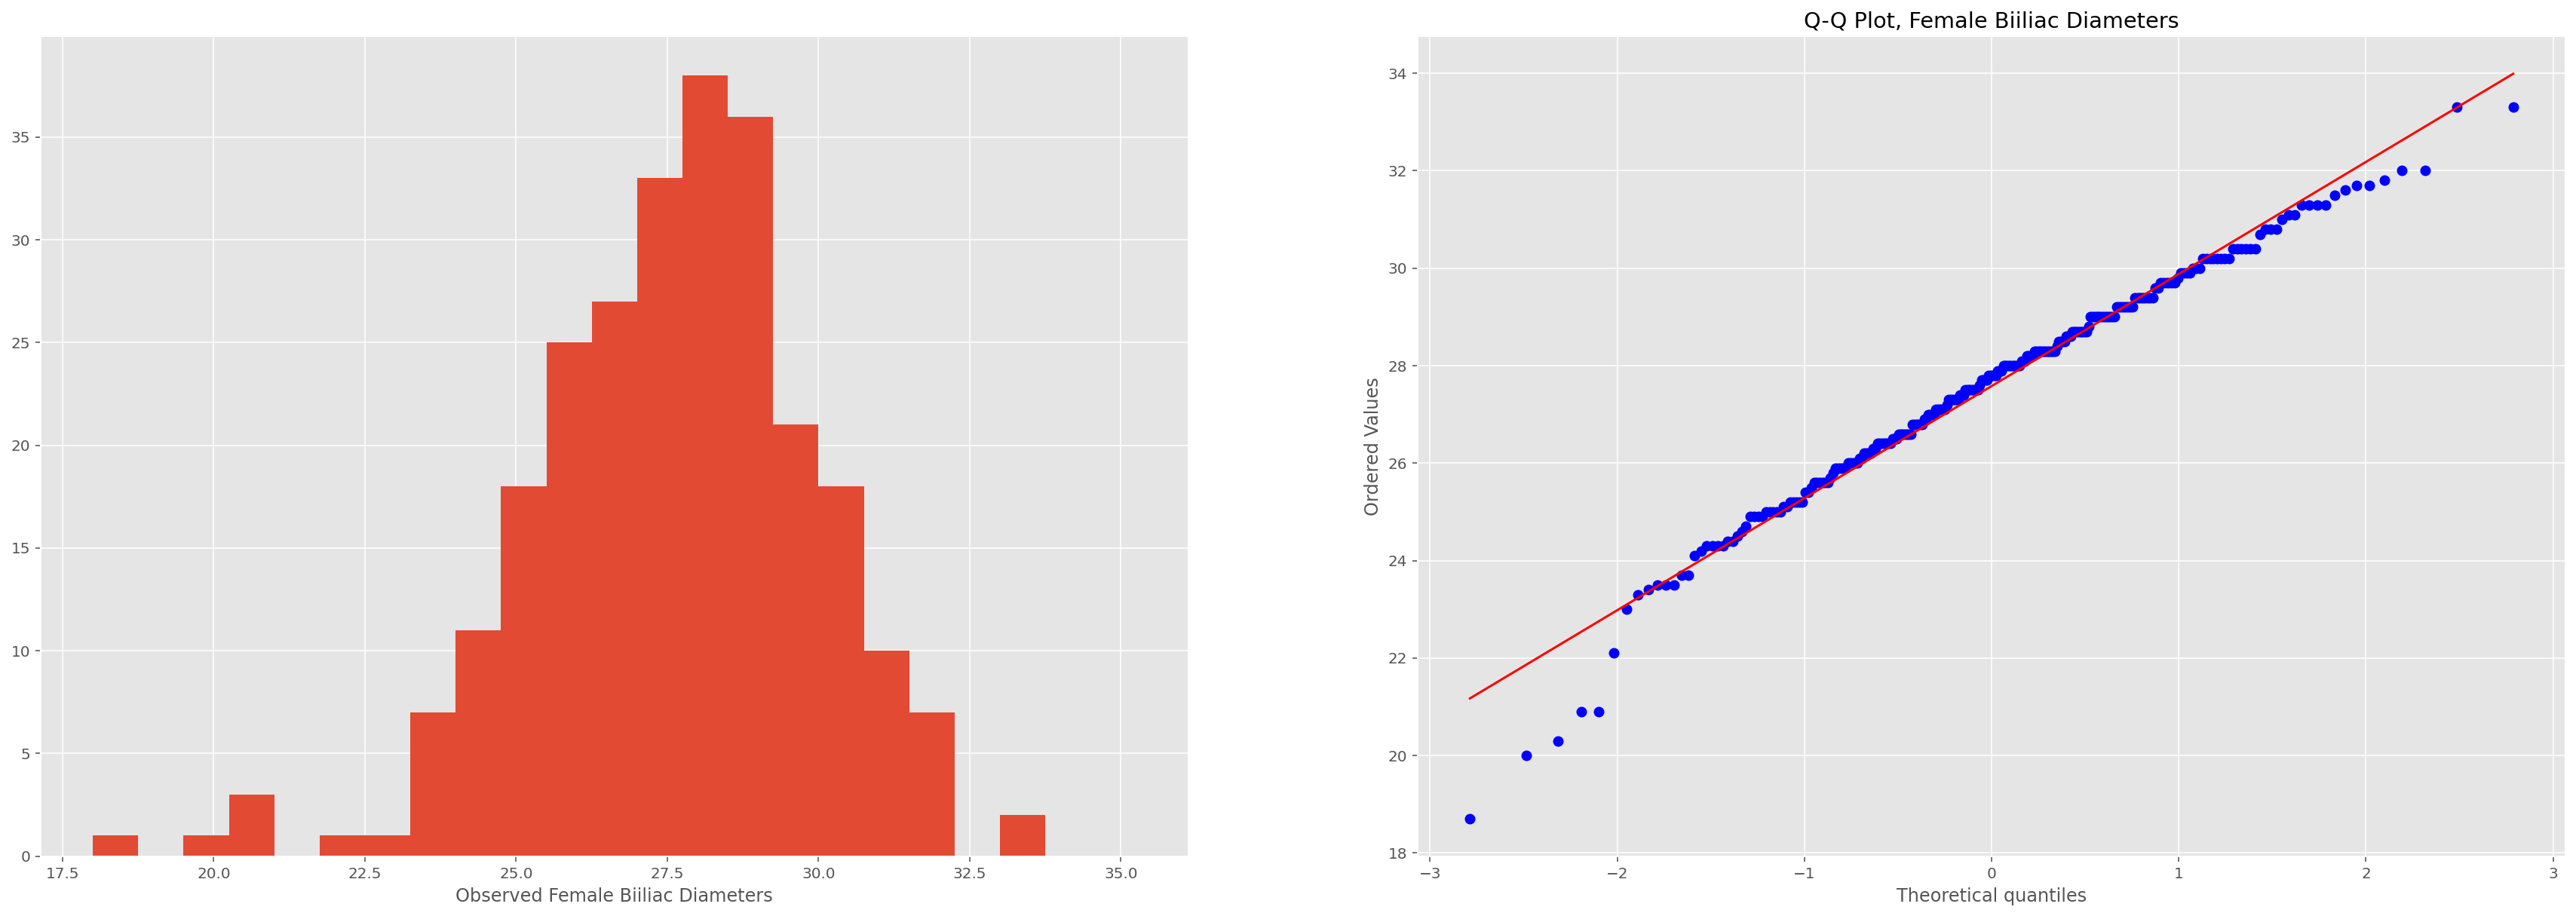

In [92]:
plt.rcParams['figure.figsize'] = (30,10)
plt.tight_layout() # adjust the subplots to fit in to the figure area.

plt.subplot(1, 2, 1)
plt.hist(fbii_dis, bins=np.arange(18.0, 36.0, 0.75))
plt.xlabel("Observed Female Biiliac Diameters")

# normal probability plot
plt.subplot(1, 2, 2)
probplot(fbii_dis, plot=plt)
plt.title('Q-Q Plot, Female Biiliac Diameters')

plt.show();

In [93]:
# female elbow diameter (elb.di) 
felb_dis = fdims['elb.di']
felb_dis_min, felb_dis_max = felb_dis.min(), felb_dis.max() # 9.9, 15.0

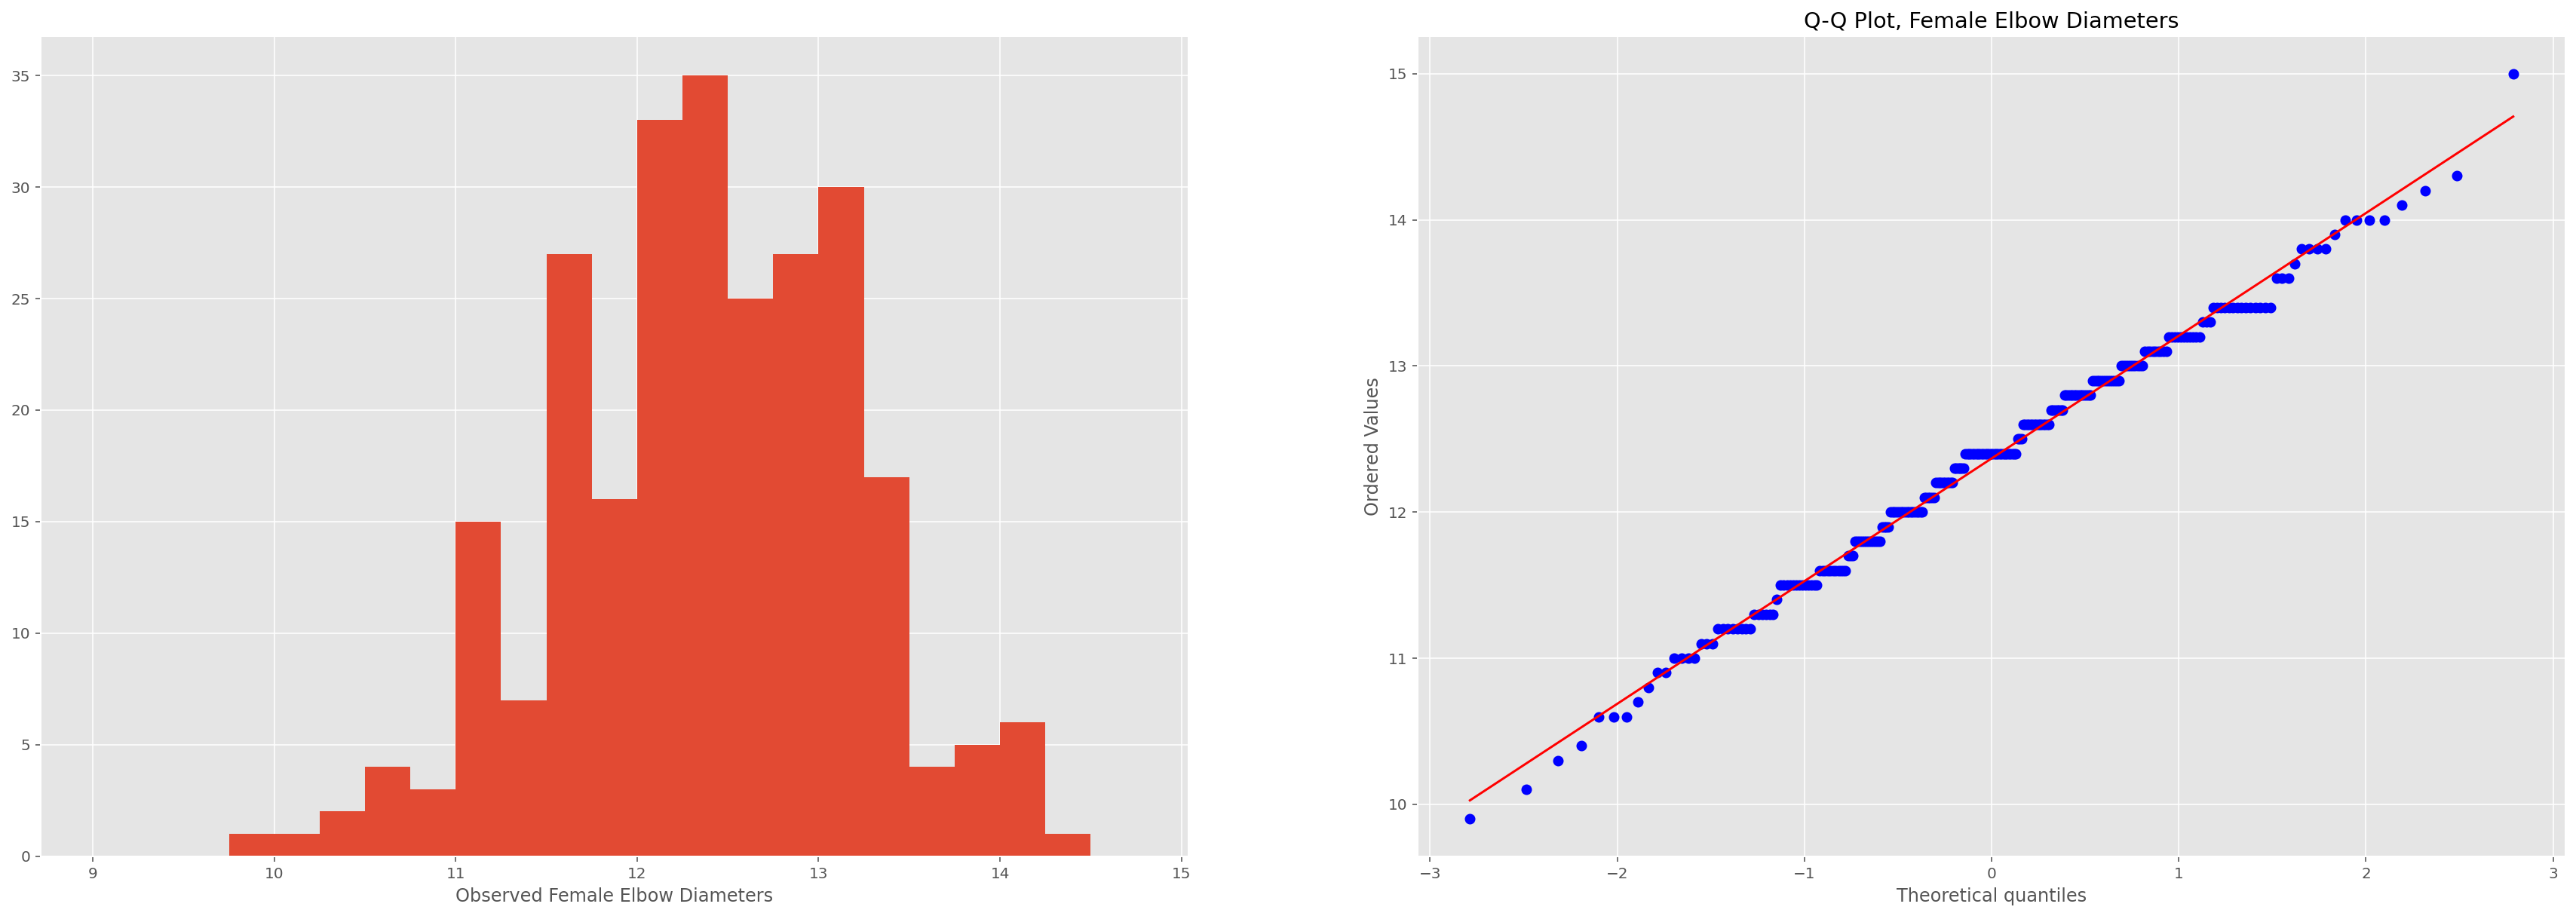

In [95]:
plt.rcParams['figure.figsize'] = (30, 10)
plt.tight_layout() # adjust the subplots to fit in to the figure area.

plt.subplot(1, 2, 1)
plt.hist(felb_dis, bins=np.arange(9.0, 15.0, 0.25))
plt.xlabel("Observed Female Elbow Diameters")

# normal probability plot
plt.subplot(1, 2, 2)
probplot(felb_dis, plot=plt)
plt.title('Q-Q Plot, Female Elbow Diameters')

plt.show();

In [97]:
# general age (age)
age = bdims['age']
age_min, age_max = age.min(), age.max() # 18, 67

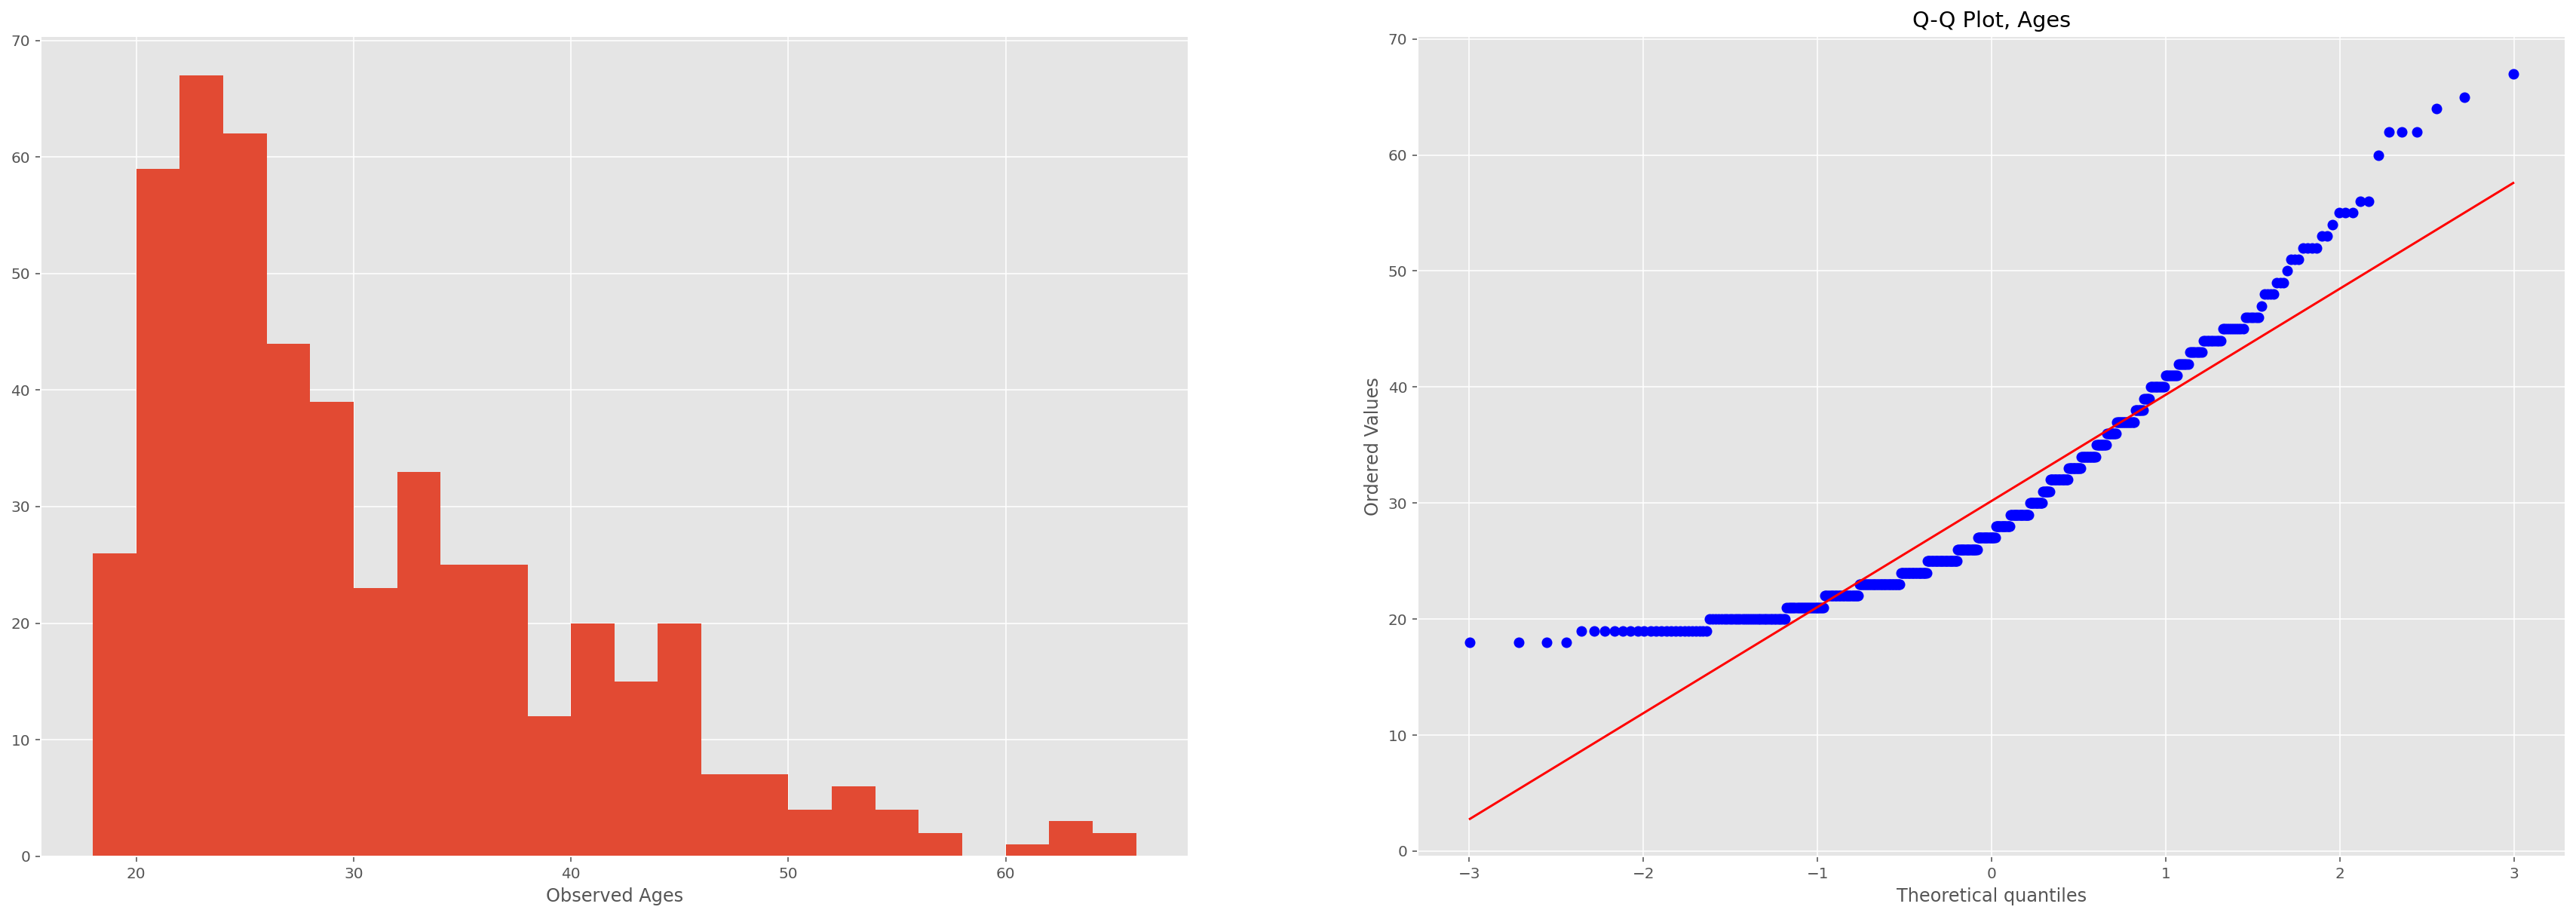

In [99]:
plt.rcParams['figure.figsize'] = (30, 10)
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.hist(age, bins=np.arange(18, 68, 2))
plt.xlabel("Observed Ages")

# normal probability plot
plt.subplot(1, 2, 2)
probplot(age, plot=plt)
plt.title('Q-Q Plot, Ages')

plt.show();

The Q-Q plot (normal probability plot) shows a "stepwise distribution" to the observed ages which is especially clear towards the "left tail" (but pretty evident throughout.) The respondent's ages were recorded in years, as the [overview for the dataset](https://www.openintro.org/book/statdata/?data=bdims) explains for the `age` definition. Since the age is being recorded in relatively "coarse" increments (rather than e.g. to within the nearest month, week etc.), this accounts for the "stepwise" appearance in part.

However, it is also clear that the individual observed ages do _not_ conform even approximately to how a theoretical normal distribution would appear. 

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com